In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [2]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [378]:
mergedTrialData_df = pd.read_csv("mergedTrialData.csv")
demographics_df = pd.read_csv("demographic.csv")

In [379]:
all_data_averaged_df = mergedTrialData_df.groupby('subject').mean()
all_data_averaged_df = all_data_averaged_df.merge(demographics_df, on='subject').rename(columns={' group': 'group'})
print(all_data_averaged.shape)

(81, 45)


# All Data Analysis

In [380]:
all_EEG_data_averaged = all_data_averaged_df.drop(columns=['subject','trial','condition',
                                                            'ITI','rejected',' gender',' age',' education'])

all_EEG_data_averaged = all_EEG_data_averaged.to_numpy()
print(np.shape(all_EEG_data_averaged))

X = all_EEG_data_averaged[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,
                       33,34,35]]
print(np.shape(X))
y = all_EEG_data_averaged[:,[36]]
print(np.shape(y))

(81, 37)
(81, 36)
(81, 1)


In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

# KNN

In [35]:
## run cv here
max_neighbors = 25

accs = np.zeros((5,max_neighbors))
precs = np.zeros((5,max_neighbors))
recs = np.zeros((5,max_neighbors))

## keep track of the train test split
j = 0


for train_index, test_index in kfold.split(X_train,y_train):
    # Get the cv train test split
    X_train_train, X_train_test = X_train[train_index], X_train[test_index]
    y_train_train, y_train_test = y_train[train_index], y_train[test_index]
    for i in range(1,max_neighbors+1):
        knn = KNeighborsClassifier(i)
        
        # fit the model
        knn.fit(X_train_train, y_train_train.ravel())
        
        y_predict = knn.predict(X_train_test)
        
        accs[j,i-1] = accuracy_score(y_train_test,y_predict)
        precs[j,i-1] = precision_score(y_train_test,y_predict)
        recs[j,i-1] = recall_score(y_train_test,y_predict)
        
    j=j+1

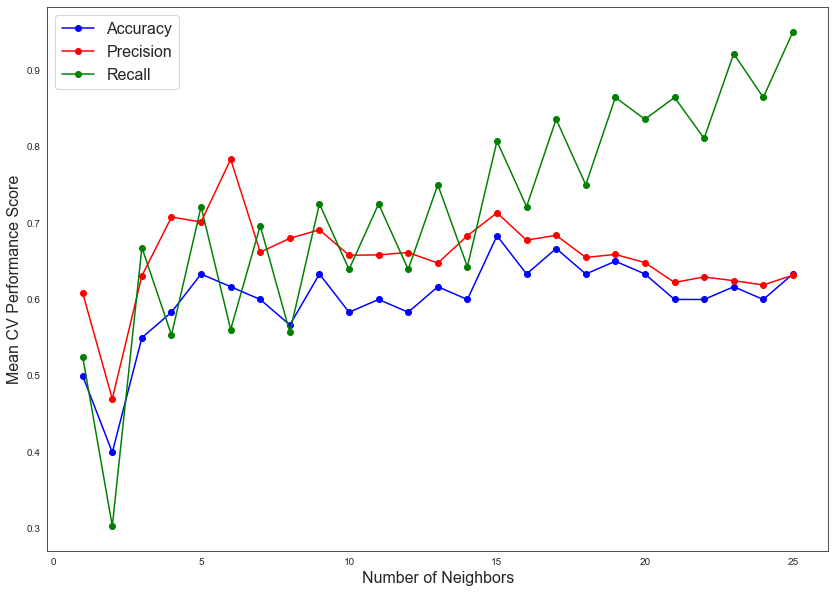

In [36]:
plt.figure(figsize=(14,10))

plt.plot(range(1,max_neighbors+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,max_neighbors+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,max_neighbors+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Number of Neighbors", fontsize=16)

plt.legend(fontsize=16)

plt.show()



In [37]:
all_averaged_knn_15 = KNeighborsClassifier(15)

all_averaged_knn_15.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=15)

In [38]:
y_predict = all_averaged_knn_15.predict(X_train)
print("accuracy", accuracy_score(y_train,y_predict))
print('precision', precision_score(y_train,y_predict))
print('recall',recall_score(y_train,y_predict))

accuracy 0.65
precision 0.6595744680851063
recall 0.8611111111111112


In [40]:
confusion_matrix(y_train, y_predict)

array([[ 8, 16],
       [ 5, 31]], dtype=int64)

In [41]:
y_predict = all_averaged_knn_15.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.7142857142857143
precision 0.7333333333333333
recall 0.8461538461538461


In [42]:
confusion_matrix(y_test, y_predict)

array([[ 4,  4],
       [ 2, 11]], dtype=int64)

# Random Forest

In [43]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=614)

# n will be the maximum max_depth I consider
n = 25

accs = np.zeros((5,n))
precs = np.zeros((5,n))
recs = np.zeros((5,n))

for j in range(1,n+1):
    print(j)
    rf = RandomForestClassifier(n_estimators = 500,max_depth=j, random_state = 614)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train, X_train_test = X_train[train_index],X_train[test_index]
        y_train_train, y_train_test = y_train[train_index],y_train[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train.ravel())
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


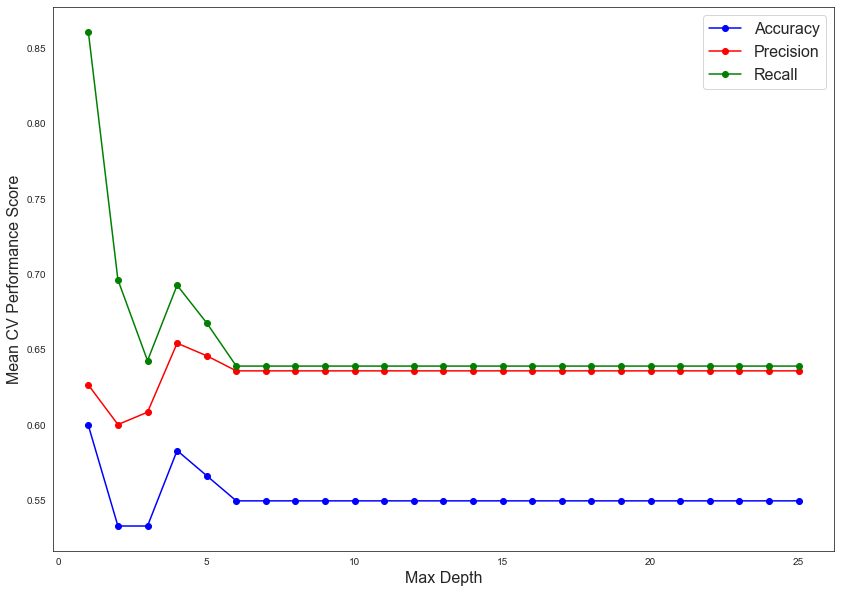

In [44]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [383]:
all_averaged_rf_4 = RandomForestClassifier(n_estimators = 500,max_depth=4, random_state = 614)
all_averaged_rf_4.fit(X_train,y_train.ravel())

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=614)

In [384]:
y_predict = all_averaged_rf_4.predict(X_train)
print("accuracy", accuracy_score(y_train,y_predict))
print('precision', precision_score(y_train,y_predict))
print('recall',recall_score(y_train,y_predict))

accuracy 1.0
precision 1.0
recall 1.0


In [54]:
confusion_matrix(y_train, y_predict)

array([[24,  0],
       [ 0, 36]], dtype=int64)

In [382]:
X_test[0:2,1]

array([-2.86266445, -5.78224431])

In [385]:
y_predict = all_averaged_rf_4.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.7142857142857143
precision 0.7692307692307693
recall 0.7692307692307693


In [56]:
confusion_matrix(y_test, y_predict)

array([[ 5,  3],
       [ 3, 10]], dtype=int64)

In [59]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=614)

estimators = np.arange(100, 2100, 100).tolist()

accs = np.zeros((5,len(estimators)))
precs = np.zeros((5,len(estimators)))
recs = np.zeros((5,len(estimators)))

for j,e in enumerate(estimators):
    rf = RandomForestClassifier(n_estimators = e,max_depth= 4, random_state = 614)
    print(j)
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train, X_train_test = X_train[train_index],X_train[test_index]
        y_train_train, y_train_test = y_train[train_index],y_train[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train.ravel())
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j] = accuracy_score(y_train_test,y_predict)
        precs[i,j] = precision_score(y_train_test,y_predict)
        recs[i,j] = recall_score(y_train_test,y_predict)
        i = i + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


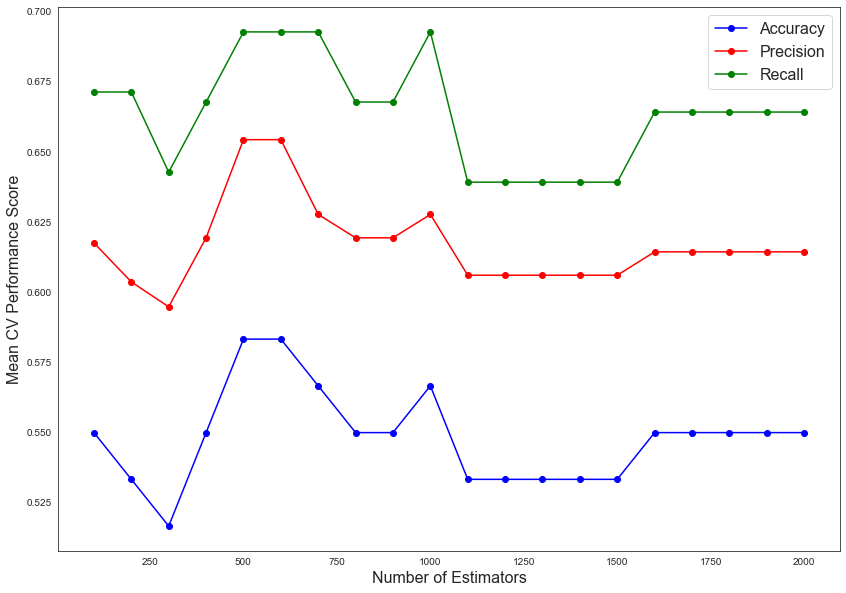

In [61]:
plt.figure(figsize=(14,10))

plt.plot(estimators, np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(estimators, np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(estimators, np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Number of Estimators",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [107]:
names = []
scores = []
X_train_copy = pd.DataFrame(data=X_train, columns = all_data_averaged_df.columns.drop(['subject','trial','condition',
                                                            'ITI','rejected','group',' gender',' age',' education']))

for name, score in zip(X_train_copy.columns,all_averaged_rf_4.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df = score_df.sort_values('importance_score',ascending=False)

In [108]:
score_df

,feature,importance_score
0,Fz_N100,0.0545
31,FC4_B1,0.0538
1,FCz_N100,0.0420
2,Cz_N100,0.0396
30,FC3_B1,0.0370
35,CP4_B1,0.0365
4,FC4_N100,0.0355
22,FC4_B0,0.0327
28,FCz_B1,0.0315
12,FC3_P200,0.0314


In [135]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=614)

accs = np.zeros((5,len(all_averaged_rf_4.feature_importances_)))
precs = np.zeros((5,len(all_averaged_rf_4.feature_importances_)))
recs = np.zeros((5,len(all_averaged_rf_4.feature_importances_)))


score_list = []

for j,s in enumerate(score_df.index):
    
    rf = RandomForestClassifier(n_estimators = 500,max_depth=4, random_state = 614)
    
    score_list.append(score_df.index[s])
    X = all_EEG_data_averaged[:,score_list]
    print(j)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train, X_train_test = X_train[train_index],X_train[test_index]
        y_train_train, y_train_test = y_train[train_index],y_train[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train.ravel())
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j] = accuracy_score(y_train_test,y_predict)
        precs[i,j] = precision_score(y_train_test,y_predict)
        recs[i,j] = recall_score(y_train_test,y_predict)
        i = i + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


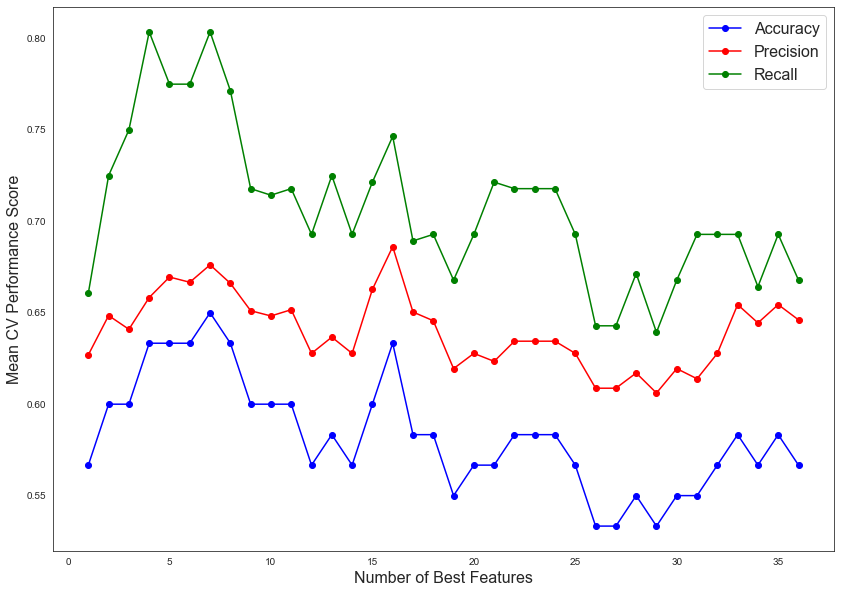

In [136]:
plt.figure(figsize=(14,10))

plt.plot(range(1,37), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,37), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,37), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Number of Best Features",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [138]:
X = all_EEG_data_averaged[:,score_df.index[0:8]]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.25,
                                                random_state = 614, 
                                                shuffle=True,
                                                stratify=y)

In [139]:
best_7_averaged_rf_4 = RandomForestClassifier(n_estimators = 500,max_depth=4, random_state = 614)
best_7_averaged_rf_4.fit(X_train,y_train.ravel())

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=614)

In [141]:
y_predict = best_7_averaged_rf_4.predict(X_train)
print("accuracy", accuracy_score(y_train,y_predict))
print('precision', precision_score(y_train,y_predict))
print('recall',recall_score(y_train,y_predict))

accuracy 0.95
precision 0.9230769230769231
recall 1.0


In [142]:
confusion_matrix(y_train, y_predict)

array([[21,  3],
       [ 0, 36]], dtype=int64)

In [144]:
y_predict = best_7_averaged_rf_4.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.6666666666666666
precision 0.7142857142857143
recall 0.7692307692307693


In [145]:
confusion_matrix(y_test, y_predict)

array([[ 4,  4],
       [ 3, 10]], dtype=int64)

In [311]:
X = all_EEG_data_averaged[:,score_df.index[0:17]]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.25,
                                                random_state = 614, 
                                                shuffle=True,
                                                stratify=y)

In [313]:
best_17_averaged_rf_4 = RandomForestClassifier(n_estimators = 500,max_depth=4, random_state = 614)
best_17_averaged_rf_4.fit(X_train,y_train.ravel())

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=614)

In [314]:
y_predict = best_17_averaged_rf_4.predict(X_train)
print("accuracy", accuracy_score(y_train,y_predict))
print('precision', precision_score(y_train,y_predict))
print('recall',recall_score(y_train,y_predict))

accuracy 1.0
precision 1.0
recall 1.0


In [149]:
confusion_matrix(y_train, y_predict)

array([[24,  0],
       [ 0, 36]], dtype=int64)

In [315]:
y_predict = best_17_averaged_rf_4.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.7142857142857143
precision 0.7692307692307693
recall 0.7692307692307693


In [151]:
confusion_matrix(y_test, y_predict)

array([[ 5,  3],
       [ 3, 10]], dtype=int64)

In [157]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=614)

# n will be the maximum max_depth I consider
n = 25

accs = np.zeros((5,n))
precs = np.zeros((5,n))
recs = np.zeros((5,n))

for j in range(1,n+1):
    print(j)
    rf = RandomForestClassifier(n_estimators = 500,max_depth=j, random_state = 614)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train, X_train_test = X_train[train_index],X_train[test_index]
        y_train_train, y_train_test = y_train[train_index],y_train[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train.ravel())
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


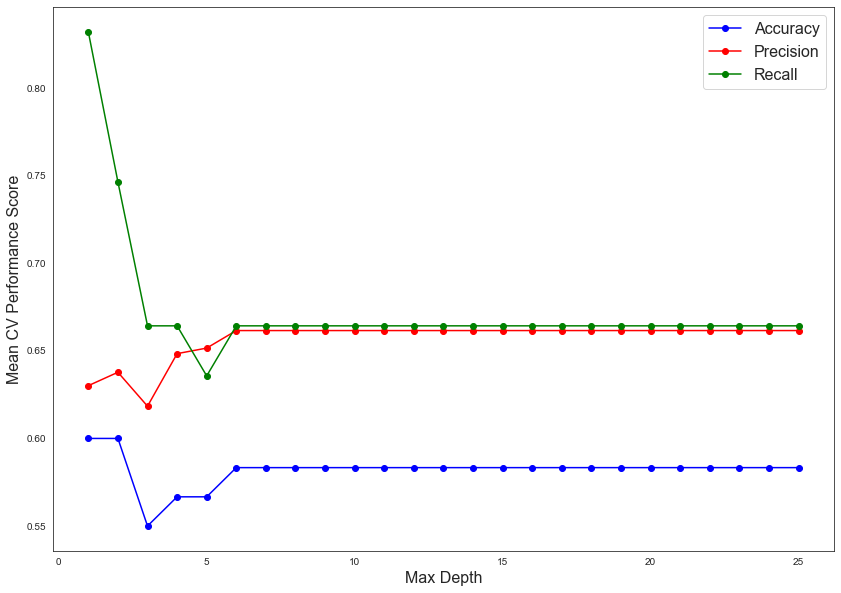

In [158]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [159]:
best_17_averaged_rf_2 = RandomForestClassifier(n_estimators = 500,max_depth=2, random_state = 614)
best_17_averaged_rf_2.fit(X_train,y_train.ravel())

RandomForestClassifier(max_depth=2, n_estimators=500, random_state=614)

In [161]:
y_predict = best_17_averaged_rf_2.predict(X_train)
print("accuracy", accuracy_score(y_train,y_predict))
print('precision', precision_score(y_train,y_predict))
print('recall',recall_score(y_train,y_predict))

accuracy 0.8333333333333334
precision 0.7954545454545454
recall 0.9722222222222222


In [162]:
confusion_matrix(y_train, y_predict)

array([[15,  9],
       [ 1, 35]], dtype=int64)

In [165]:
y_predict = best_17_averaged_rf_2.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.7142857142857143
precision 0.7692307692307693
recall 0.7692307692307693


In [164]:
confusion_matrix(y_test, y_predict)

array([[ 5,  3],
       [ 3, 10]], dtype=int64)

# Button Tone analysis

In [331]:
Button_Tone_Press_df = mergedTrialData_df[mergedTrialData_df.condition == 1]

Play_Tone_df = mergedTrialData_df[mergedTrialData_df.condition == 2]
Play_Tone_df = Play_Tone_df.reset_index(drop=True)

Button_Press_df = mergedTrialData_df[mergedTrialData_df.condition == 3]
Button_Press_df = Button_Press_df.reset_index(drop=True)

In [332]:
Button_Tone_Press_averaged_df = Button_Tone_Press_df.groupby('subject').mean()
Play_Tone_averaged_df = Play_Tone_df.groupby('subject').mean()
Button_Press_averaged_df = Button_Press_df.groupby('subject').mean()

In [291]:
Button_Tone_Play_Tone_averaged_df = Button_Tone_Press_averaged_df.drop(columns=['trial','condition',
                                                            'ITI','rejected'])
Play_Tone_averaged_df_temp = Play_Tone_averaged_df.drop(columns=['trial','condition',
                                                            'ITI','rejected'])
Button_Tone_Play_Tone_averaged_df = Button_Tone_Play_Tone_averaged_df.subtract(Play_Tone_averaged_df_temp, fill_value=0)


In [292]:
Button_Tone_Play_Tone_averaged_df = Button_Tone_Play_Tone_averaged_df.merge(demographics_df, on='subject').rename(columns={' group': 'group'})
print(Button_Tone_Play_Tone_averaged_df.shape)

(81, 41)


In [293]:
Button_Tone_Play_Tone_averaged = Button_Tone_Play_Tone_averaged_df.drop(columns=['subject',' gender',' age',
                                                            ' education'])

Button_Tone_Play_Tone_averaged = Button_Tone_Play_Tone_averaged.to_numpy()
print(np.shape(Button_Tone_Play_Tone_averaged))

(81, 37)


In [294]:
X = Button_Tone_Play_Tone_averaged[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,
                       33,34,35]]
print(np.shape(X))
y = Button_Tone_Play_Tone_averaged[:,[36]]
print(np.shape(y))

(81, 36)
(81, 1)


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

# KNN

In [296]:
## run cv here
max_neighbors = 25

accs = np.zeros((5,max_neighbors))
precs = np.zeros((5,max_neighbors))
recs = np.zeros((5,max_neighbors))

## keep track of the train test split
j = 0


for train_index, test_index in kfold.split(X_train,y_train):
    # Get the cv train test split
    X_train_train, X_train_test = X_train[train_index], X_train[test_index]
    y_train_train, y_train_test = y_train[train_index], y_train[test_index]
    for i in range(1,max_neighbors+1):
        knn = KNeighborsClassifier(i)
        
        # fit the model
        knn.fit(X_train_train, y_train_train.ravel())
        
        y_predict = knn.predict(X_train_test)
        
        accs[j,i-1] = accuracy_score(y_train_test,y_predict)
        precs[j,i-1] = precision_score(y_train_test,y_predict)
        recs[j,i-1] = recall_score(y_train_test,y_predict)
        
    j=j+1

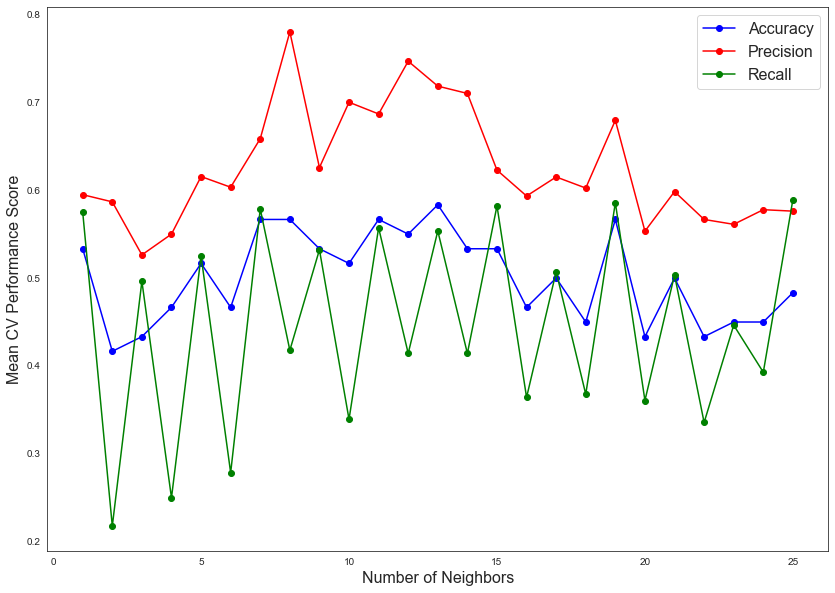

In [297]:
plt.figure(figsize=(14,10))

plt.plot(range(1,max_neighbors+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,max_neighbors+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,max_neighbors+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Number of Neighbors", fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [298]:
Button_Tone_Play_Tone_averaged_knn_19 = KNeighborsClassifier(19)

Button_Tone_Play_Tone_averaged_knn_19.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=19)

In [299]:
y_predict = Button_Tone_Play_Tone_averaged_knn_19.predict(X_train)
print("accuracy", accuracy_score(y_train,y_predict))
print('precision', precision_score(y_train,y_predict))
print('recall',recall_score(y_train,y_predict))

accuracy 0.65
precision 0.7419354838709677
recall 0.6388888888888888


In [300]:
confusion_matrix(y_train, y_predict)

array([[16,  8],
       [13, 23]], dtype=int64)

In [301]:
y_predict = Button_Tone_Play_Tone_averaged_knn_19.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.6190476190476191
precision 0.6923076923076923
recall 0.6923076923076923


In [302]:
confusion_matrix(y_test, y_predict)

array([[4, 4],
       [4, 9]], dtype=int64)

# Random Forest

In [303]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=614)

# n will be the maximum max_depth I consider
n = 25

accs = np.zeros((5,n))
precs = np.zeros((5,n))
recs = np.zeros((5,n))

for j in range(1,n+1):
    print(j)
    rf = RandomForestClassifier(n_estimators = 500,max_depth=j, random_state = 614)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train, X_train_test = X_train[train_index],X_train[test_index]
        y_train_train, y_train_test = y_train[train_index],y_train[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train.ravel())
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


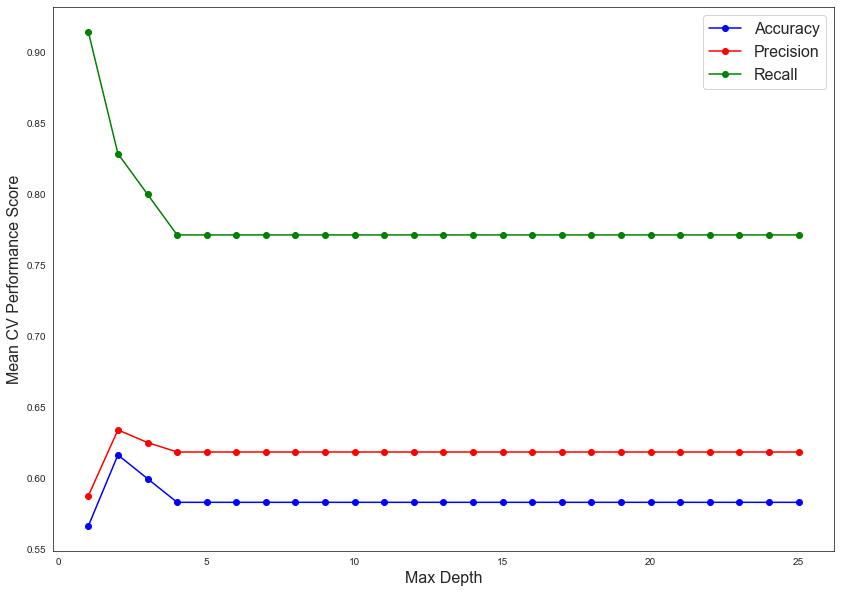

In [304]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [305]:
Button_Tone_Play_Tone_averaged_rf_2 = RandomForestClassifier(n_estimators = 500,max_depth=2, random_state = 614)
Button_Tone_Play_Tone_averaged_rf_2.fit(X_train,y_train.ravel())

RandomForestClassifier(max_depth=2, n_estimators=500, random_state=614)

In [306]:
y_predict = Button_Tone_Play_Tone_averaged_rf_2.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.7142857142857143
precision 0.7058823529411765
recall 0.9230769230769231


# Suppresion Analysis

In [354]:
Button_Tone_Play_Tone_averaged_df = Button_Tone_Press_averaged_df.drop(columns=['trial','condition',
                                                            'ITI','rejected'])
Play_Tone_averaged_df_temp = Play_Tone_averaged_df.drop(columns=['trial','condition',
                                                            'ITI','rejected'])
Button_Tone_Play_Tone_averaged_df = Button_Tone_Play_Tone_averaged_df.subtract(Play_Tone_averaged_df_temp, fill_value=0)

In [355]:
Button_Press_averaged_df_temp = Button_Press_averaged_df.drop(columns=['trial','condition',
                                                            'ITI','rejected'])

Button_Play_Tone_averaged_df = Button_Tone_Play_Tone_averaged_df.subtract(Button_Press_averaged_df_temp, fill_value=0)  

Button_Play_Tone_averaged_df = Button_Play_Tone_averaged_df.merge(demographics_df, on='subject').rename(columns={' group': 'group'})
print(Button_Play_Tone_averaged_df.shape)


(81, 41)


In [356]:
Button_Play_Tone_averaged = Button_Play_Tone_averaged_df.drop(columns=['subject',' gender',' age',
                                                            ' education'])

Button_Play_Tone_averaged = Button_Play_Tone_averaged.to_numpy()
print(np.shape(Button_Play_Tone_averaged))

(81, 37)


In [357]:
X = Button_Play_Tone_averaged[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,
                       33,34,35]]
print(np.shape(X))
y = Button_Play_Tone_averaged[:,[36]]
print(np.shape(y))

(81, 36)
(81, 1)


In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

In [359]:
np.shape(X_train)

(60, 36)

In [360]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=614)

# n will be the maximum max_depth I consider
n = 25

accs = np.zeros((5,n))
precs = np.zeros((5,n))
recs = np.zeros((5,n))

for j in range(1,n+1):
    print(j)
    rf = RandomForestClassifier(n_estimators = 500,max_depth=j, random_state = 614)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train, X_train_test = X_train[train_index],X_train[test_index]
        y_train_train, y_train_test = y_train[train_index],y_train[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train.ravel())
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


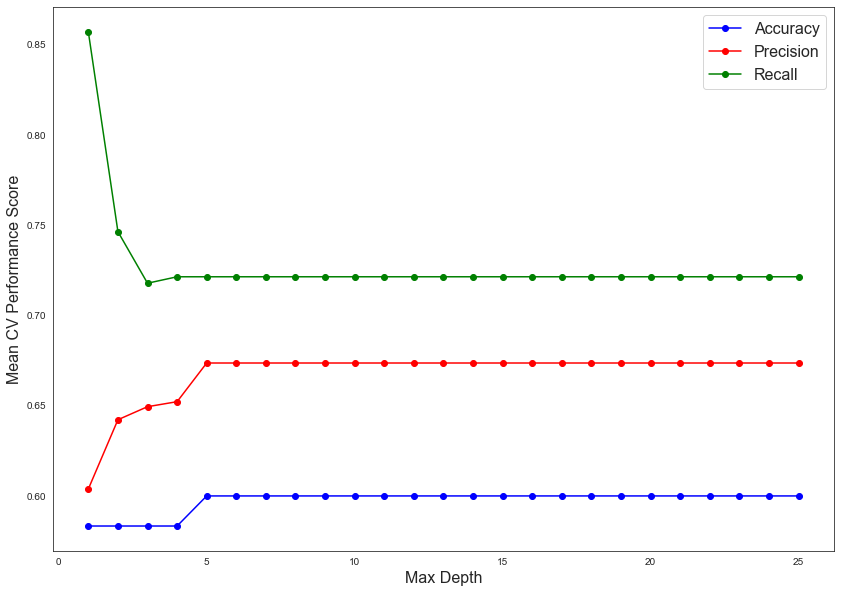

In [361]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [362]:
Button_Play_Tone_averaged_rf_5 = RandomForestClassifier(n_estimators = 500,max_depth=5, random_state = 614)
Button_Play_Tone_averaged_rf_5.fit(X_train,y_train.ravel())

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=614)

In [363]:
y_predict = Button_Play_Tone_averaged_rf_5.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.6666666666666666
precision 0.7142857142857143
recall 0.7692307692307693


In [364]:
names = []
scores = []
X_train_copy = pd.DataFrame(data=X_train, columns = Button_Play_Tone_averaged_df.columns.drop(['subject','group',' gender',' age',' education']))

for name, score in zip(X_train_copy.columns,Button_Play_Tone_averaged_rf_5.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df = score_df.sort_values('importance_score',ascending=False)

In [365]:
score_df

,feature,importance_score
3,FC3_N100,0.0833
31,FC4_B1,0.0502
0,Fz_N100,0.0473
5,C3_N100,0.0459
1,FCz_N100,0.0439
2,Cz_N100,0.0377
21,FC3_B0,0.0356
35,CP4_B1,0.0349
18,Fz_B0,0.0325
19,FCz_B0,0.0309


In [366]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=614)

accs = np.zeros((5,len(all_averaged_rf_4.feature_importances_)))
precs = np.zeros((5,len(all_averaged_rf_4.feature_importances_)))
recs = np.zeros((5,len(all_averaged_rf_4.feature_importances_)))


score_list = []

for j,s in enumerate(score_df.index):
    
    rf = RandomForestClassifier(n_estimators = 500,max_depth=4, random_state = 614)
    
    score_list.append(score_df.index[s])
    X = Button_Play_Tone_averaged[:,score_list]
    print(j)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train, X_train_test = X_train[train_index],X_train[test_index]
        y_train_train, y_train_test = y_train[train_index],y_train[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train.ravel())
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j] = accuracy_score(y_train_test,y_predict)
        precs[i,j] = precision_score(y_train_test,y_predict)
        recs[i,j] = recall_score(y_train_test,y_predict)
        i = i + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


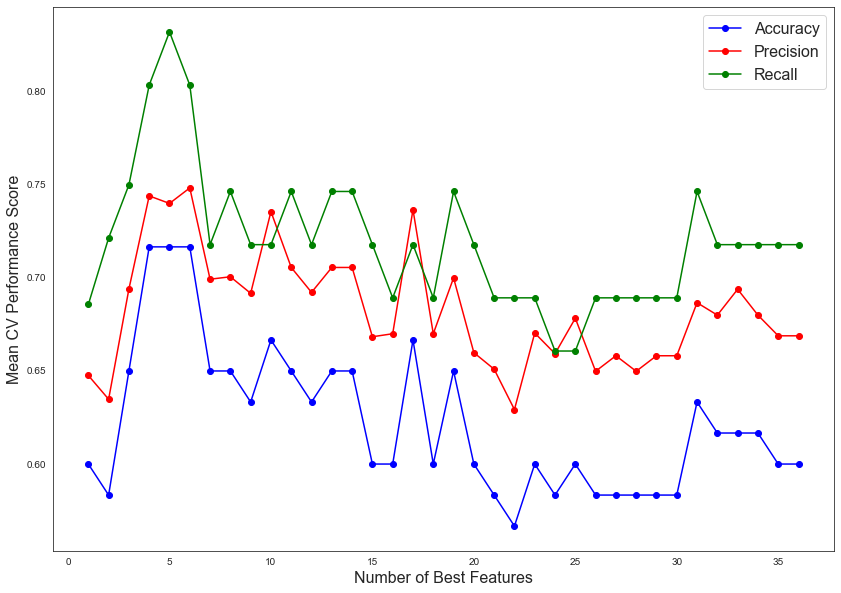

In [367]:
plt.figure(figsize=(14,10))

plt.plot(range(1,37), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,37), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,37), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Number of Best Features",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [371]:
X = Button_Play_Tone_averaged[:,score_df.index[0:6]]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.25,
                                                random_state = 614, 
                                                shuffle=True,
                                                stratify=y)

In [376]:
score_df.index[0:6]

Int64Index([3, 31, 0, 5, 1, 2], dtype='int64')

In [372]:
np.shape(X_train)

(60, 6)

In [373]:
suppression_best_6_averaged_rf_5 = RandomForestClassifier(n_estimators = 500,max_depth=5, random_state = 614)
suppression_best_6_averaged_rf_5.fit(X_train,y_train.ravel())

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=614)

In [374]:
y_predict = suppression_best_6_averaged_rf_5.predict(X_train)
print("accuracy", accuracy_score(y_train,y_predict))
print('precision', precision_score(y_train,y_predict))
print('recall',recall_score(y_train,y_predict))

accuracy 1.0
precision 1.0
recall 1.0


In [377]:
X_test[0:2,1]

array([ 0.32232226, -0.54926029])

In [375]:
y_predict = suppression_best_6_averaged_rf_5.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.7142857142857143
precision 0.7692307692307693
recall 0.7692307692307693
